# TensorFlow 2.0 설치
[런타임] -> [런타임 유형변경]에서 하드웨어 가속기를 꼭 GPU로 설정!

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 80kB/s 
     |████████████████████████████████| 3.8MB 28.5MB/s 
     |████████████████████████████████| 450kB 38.8MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


## Google Drive 연동시키기

In [2]:
from google.colab import drive
import os
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Simple Linear Regression

## Importing Libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
# For reproducibility
np.random.seed(777)

In [0]:
# Input data 생성
## y = 1 * x + 2를 따르는 noisy한 data를 100개 생성함

# inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

# ground truth
#slopes = np.random.normal(1, 0.5, 100).astype(np.float32)
#intercept = 2.

slopes = 1
intercept = np.random.normal(2, 0.2, 100).astype(np.float32)

# outputs
y = x * slopes + intercept

In [5]:
slopes

1

In [6]:
intercept

array([1.7327269, 2.1041272, 1.9442523, 1.9518534, 2.0558298, 2.0415432,
       1.9236923, 1.6505262, 2.1028452, 1.9681994, 1.8460938, 2.2015612,
       1.8452293, 2.2741868, 2.0998096, 1.8685406, 2.0304165, 1.8431274,
       1.8482791, 2.1573591, 2.2045064, 2.041641 , 1.9526404, 1.8490437,
       1.9922804, 2.0750597, 1.93483  , 1.7789629, 2.2387087, 1.954802 ,
       2.169889 , 2.1374037, 1.9244022, 1.9777511, 2.4331012, 2.2840874,
       1.880729 , 2.1895645, 1.9103446, 2.3491986, 2.297433 , 1.8841876,
       2.0939426, 1.7706187, 2.3505855, 1.703467 , 1.4962308, 1.6680224,
       2.1685443, 1.8060184, 1.7165222, 2.2430956, 2.1326537, 1.815141 ,
       1.8335327, 1.9588721, 1.9545087, 2.1883264, 1.9650006, 2.0744264,
       1.7607261, 2.1181948, 1.6340063, 1.9123398, 1.8118514, 1.7962682,
       2.2231517, 2.1301205, 1.9946015, 1.9463401, 2.1554322, 2.2054675,
       2.1457448, 1.9643514, 1.8960023, 2.0130482, 1.8774751, 1.7587504,
       2.0666113, 2.1278408, 1.7835176, 2.0140142, 

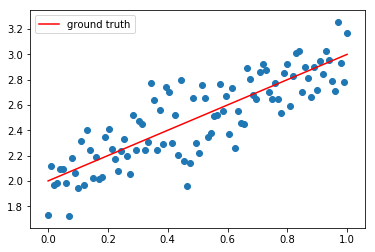

In [7]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

In [8]:
# input data type 확인
x.dtype

dtype('float32')

In [9]:
# label type 확인
y.dtype

dtype('float32')

In [10]:
# input data shape 확인
x.shape

(100,)

In [11]:
# label shape 확인
y.shape

(100,)

In [0]:
# Weight와 bias 만들기
## Variables = Parameters = Weights
w = tf.Variable(.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
# learning rate
learning_rate = 0.1

In [14]:
# Training
## loss function을 정의하고, gradient를 계산하여 GD 방법으로 weight update
loss_list, w_list, b_list = [], [], []
for epoch in range(20):
    with tf.GradientTape() as tape:
        ## prediction = y_hat = hypothesis
        preds = x * w + b # (100,)
        loss = tf.reduce_mean(tf.square(preds - y))
    w_grad, b_grad = tape.gradient(loss, [w, b])
    w.assign_sub(learning_rate * w_grad)
    b.assign_sub(learning_rate * b_grad)
    print(epoch+1, "\t", loss.numpy(), "\t", w.numpy(), "\t", b.numpy())
    loss_list.append(loss.numpy())
    w_list.append(w.numpy())
    b_list.append(b.numpy())

1 	 6.047656 	 0.35882077 	 0.48783866
2 	 3.3846 	 0.5515158 	 0.85222757
3 	 1.9009281 	 0.69486076 	 1.1244692
4 	 1.0743194 	 0.80137694 	 1.327928
5 	 0.61377573 	 0.8804103 	 1.4800434
6 	 0.35717583 	 0.93893665 	 1.5938324
7 	 0.21419834 	 0.9821626 	 1.6790109
8 	 0.13452294 	 1.0139744 	 1.7428311
9 	 0.09011509 	 1.0372727 	 1.7907062
10 	 0.065356076 	 1.0542225 	 1.8266764
11 	 0.051544365 	 1.0664395 	 1.8537575
12 	 0.04383216 	 1.0751299 	 1.8742007
13 	 0.039518576 	 1.0811936 	 1.8896862
14 	 0.03709888 	 1.0853025 	 1.9014683
15 	 0.035734765 	 1.0879579 	 1.9104831
16 	 0.03495915 	 1.0895338 	 1.9174294
17 	 0.034511834 	 1.0903095 	 1.9228289
18 	 0.03424782 	 1.0904933 	 1.9270709
19 	 0.034086324 	 1.0902406 	 1.930446
20 	 0.03398233 	 1.0896673 	 1.9331715


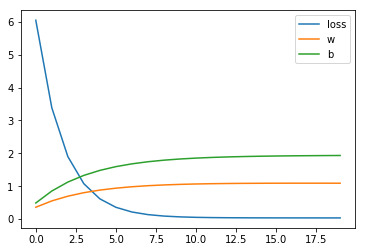

In [15]:
# Training graph
plt.plot(loss_list, label="loss")
plt.plot(w_list, label="w")
plt.plot(b_list, label="b")
plt.legend()
plt.show()

In [27]:
print(w.numpy(), b.numpy())

1.0896673 1.9331715


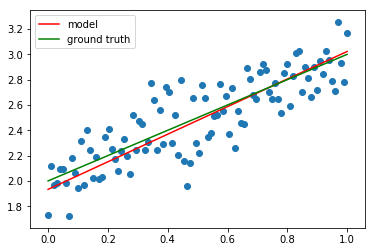

In [16]:
# 결과 확인
plt.scatter(x, y)
plt.plot(x, x * w_list[-1] + b_list[-1], label="model", c="r")
plt.plot(x, x * 1 + 2., label="ground truth", c="g")
plt.legend()
plt.show()

# Simple Linear Regression with Keras

In [0]:
# linear layer를 나타내는 keras api
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [0]:
# linear model 만들기
model = tf.keras.models.Sequential([l0])

In [0]:
# loss function과 optimizer 설정
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(learning_rate))

In [21]:
# model 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training
history = model.fit(x, y, epochs=20)

Train on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 13ms/sample - loss: 4.7020
Epoch 2/20
100/100 [==============================] - 0s 193us/sample - loss: 0.5517
Epoch 3/20
100/100 [==============================] - 0s 175us/sample - loss: 0.0849
Epoch 4/20
100/100 [==============================] - 0s 174us/sample - loss: 0.0461
Epoch 5/20
100/100 [==============================] - 0s 163us/sample - loss: 0.0398
Epoch 6/20
100/100 [==============================] - 0s 176us/sample - loss: 0.0388
Epoch 7/20
100/100 [==============================] - 0s 181us/sample - loss: 0.0382
Epoch 8/20
100/100 [==============================] - 0s 169us/sample - loss: 0.0378
Epoch 9/20
100/100 [==============================] - 0s 176us/sample - loss: 0.0373
Epoch 10/20
100/100 [==============================] - 0s 173us/sample - loss: 0.0368
Epoch 11/20
100/100 [==============================] - 0s 211us/sample - loss: 0.0365
Epoch 12/20
100/100 [======================

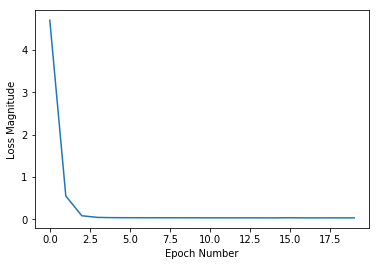

In [23]:
# Training graph - loss
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [28]:
# 최종 weight와 bias값 확인
print(model.variables[0].numpy(), model.variables[1].numpy())

[[0.86639833]] [2.0705142]


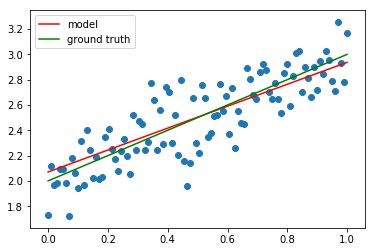

In [25]:
# 결과 확인
plt.scatter(x, y)
plt.plot(x, x * model.variables[0][0].numpy() + model.variables[1].numpy(), label="model", c="r")
plt.plot(x, x * 1 + 2., label="ground truth", c="g")
plt.legend()
plt.show()

# Linear Regression from Text

In [0]:
# input file 경로
DATA_FILE = '/content/drive/My Drive/new_drug_adv_tf/data/birth_life_2010.txt'

In [0]:
# data preprocessing
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [0]:
data, n_samples = read_birth_life_data(DATA_FILE)

In [0]:
# weight, bias 만들기
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
# learning rate & optimizer
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [35]:
# Training with stochastic gradient descent
n_epoch = 100
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in data:
        with tf.GradientTape() as tape:
            hypothesis = w * x + b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        total_loss += loss
    print('Epoch {0}: {1}'.format(epoch+1, total_loss/n_samples))

Epoch 1: 1656.550048828125
Epoch 2: 957.05224609375
Epoch 3: 845.3574829101562
Epoch 4: 751.33642578125
Epoch 5: 668.1957397460938
Epoch 6: 594.6158447265625
Epoch 7: 529.498779296875
Epoch 8: 471.8717956542969
Epoch 9: 420.87432861328125
Epoch 10: 375.7457275390625
Epoch 11: 335.8111877441406
Epoch 12: 300.47357177734375
Epoch 13: 269.2049865722656
Epoch 14: 241.5377655029297
Epoch 15: 217.05789184570312
Epoch 16: 195.3992156982422
Epoch 17: 176.23704528808594
Epoch 18: 159.28453063964844
Epoch 19: 144.2869415283203
Epoch 20: 131.0201873779297
Epoch 21: 119.28470611572266
Epoch 22: 108.90458679199219
Epoch 23: 99.72322845458984
Epoch 24: 91.60327911376953
Epoch 25: 84.4225845336914
Epoch 26: 78.07245635986328
Epoch 27: 72.45730590820312
Epoch 28: 67.49275970458984
Epoch 29: 63.103614807128906
Epoch 30: 59.22303771972656
Epoch 31: 55.793113708496094
Epoch 32: 52.76158905029297
Epoch 33: 50.08254623413086
Epoch 34: 47.715213775634766
Epoch 35: 45.623287200927734
Epoch 36: 43.77528762817

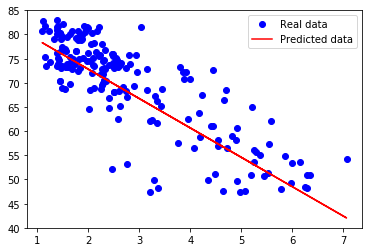

In [36]:
# 결과 확인
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

# Linear Regression from Text (Mini-batch)

In [0]:
# batch_size와 epoch 설정
batch_size = 10
n_epoch = 100

In [0]:
# weight, bias 만들기
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
# learning rate, optimizer
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [41]:
# training - mini-batch gradient descent
total_steps = int(n_samples/batch_size)
for epoch in range(n_epoch):
    total_loss = 0.
    for i in range(total_steps):
        x = data[i*batch_size:(i+1)*batch_size, 0]
        y = data[i*batch_size:(i+1)*batch_size, 1]
        with tf.GradientTape() as tape:
            hypothesis = w * x + b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        total_loss += loss / total_steps
    print('Epoch {0}: {1}'.format(epoch+1, total_loss))

Epoch 1: 3847.700927734375
Epoch 2: 2473.8515625
Epoch 3: 1846.0970458984375
Epoch 4: 1550.169677734375
Epoch 5: 1403.2366943359375
Epoch 6: 1324.137451171875
Epoch 7: 1276.542724609375
Epoch 8: 1243.9937744140625
Epoch 9: 1218.9091796875
Epoch 10: 1197.716552734375
Epoch 11: 1178.682861328125
Epoch 12: 1160.9371337890625
Epoch 13: 1144.0230712890625
Epoch 14: 1127.69091796875
Epoch 15: 1111.7979736328125
Epoch 16: 1096.259521484375
Epoch 17: 1081.0224609375
Epoch 18: 1066.05322265625
Epoch 19: 1051.3294677734375
Epoch 20: 1036.8360595703125
Epoch 21: 1022.5618286132812
Epoch 22: 1008.499267578125
Epoch 23: 994.6414184570312
Epoch 24: 980.9837036132812
Epoch 25: 967.5220336914062
Epoch 26: 954.2525024414062
Epoch 27: 941.172119140625
Epoch 28: 928.2774658203125
Epoch 29: 915.56591796875
Epoch 30: 903.0344848632812
Epoch 31: 890.6808471679688
Epoch 32: 878.501953125
Epoch 33: 866.4957885742188
Epoch 34: 854.6597290039062
Epoch 35: 842.9912719726562
Epoch 36: 831.4879150390625
Epoch 37: 

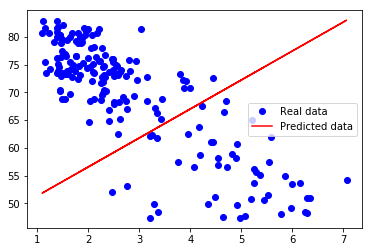

In [42]:
# 결과 확인
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

# Linear Regression from Text using tf.data

In [0]:
# tf.data를 이용하여 dataset 만들기
## data, n_samples = read_birth_life_data(DATA_FILE)

dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))
dataset = dataset.shuffle(1000).batch(10)

In [0]:
# weight, bias 만들기
w = tf.Variable(0.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [0]:
# learning rate, optimizer
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [46]:
# Training
total_steps = int(n_samples/batch_size)
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in dataset:        
        with tf.GradientTape() as tape:
            hypothesis = w * x + b
            loss = tf.reduce_mean(tf.square(hypothesis - y))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        total_loss += loss / total_steps
    print('Epoch {0}: {1}'.format(epoch+1, total_loss))

Epoch 1: 1786.2791748046875
Epoch 2: 1111.69482421875
Epoch 3: 981.1616821289062
Epoch 4: 843.3601684570312
Epoch 5: 737.2168579101562
Epoch 6: 644.9176635742188
Epoch 7: 559.251220703125
Epoch 8: 490.84100341796875
Epoch 9: 435.580322265625
Epoch 10: 378.07781982421875
Epoch 11: 329.9137268066406
Epoch 12: 291.7853088378906
Epoch 13: 252.19479370117188
Epoch 14: 230.228515625
Epoch 15: 197.97027587890625
Epoch 16: 177.90916442871094
Epoch 17: 154.8191375732422
Epoch 18: 141.04214477539062
Epoch 19: 127.69328308105469
Epoch 20: 114.76465606689453
Epoch 21: 103.4851303100586
Epoch 22: 92.70257568359375
Epoch 23: 85.1794662475586
Epoch 24: 76.8337173461914
Epoch 25: 71.64925384521484
Epoch 26: 66.43512725830078
Epoch 27: 61.81264114379883
Epoch 28: 56.69277572631836
Epoch 29: 53.827884674072266
Epoch 30: 50.601619720458984
Epoch 31: 48.03251647949219
Epoch 32: 45.65012741088867
Epoch 33: 44.116111755371094
Epoch 34: 42.054962158203125
Epoch 35: 40.37892532348633
Epoch 36: 39.083900451660

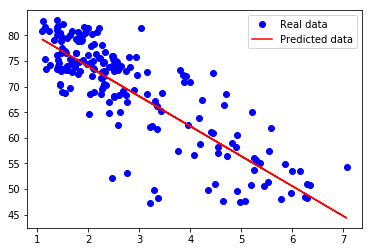

In [47]:
# 결과 확인
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

# Logistic Regression

## Pima Indians Diabetes Dataset for Binary Classification

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.


이 dataset의 몇가지 주요 항목을 살펴보면 다음과 같습니다

- 인스턴스 수 : 768개
- 속성 수 : 8가지
- 클래스 수 : 2가지

8가지 속성(1번~8번)과 결과(9번)의 상세 내용은 다음과 같습니다.

1. 임신 횟수
2. 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
3. 이완기 혈압 (mm Hg)
4. 삼두근 피부 두겹 두께 (mm)
5. 2 시간 혈청 인슐린 (mu U/ml)
6. 체질량 지수
7. 당뇨 직계 가족력
8. 나이 (세)
9. 5년 이내 당뇨병이 발병 여부

In [0]:
# input file
DATA_FILE = '/content/drive/My Drive/new_drug_adv_tf/data/pima-indians-diabetes.csv'

In [49]:
# input file 읽기
xy = np.loadtxt(DATA_FILE, delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)
print(xy)

(768, 8) (768, 1)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [0]:
# data preprocessing을 위한 minmax scaler
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [51]:
# preprocessing
x_train = MinMaxScaler(x_train)
x_train

array([[0.3529412 , 0.74371856, 0.59016395, ..., 0.5007451 , 0.23441501,
        0.48333332],
       [0.05882353, 0.42713568, 0.5409836 , ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.919598  , 0.52459013, ..., 0.34724292, 0.25362936,
        0.18333334],
       ...,
       [0.29411766, 0.6080402 , 0.59016395, ..., 0.390462  , 0.07130657,
        0.15      ],
       [0.05882353, 0.63316584, 0.4918033 , ..., 0.44858423, 0.11571307,
        0.43333334],
       [0.05882353, 0.46733668, 0.57377046, ..., 0.45305514, 0.10119555,
        0.03333334]], dtype=float32)

In [0]:
# batch size, epoch, learning rate 설정
batch_size = x_train.shape[0]
n_epoch = 1000
learning_rate = 0.1

In [0]:
# dataset 만들기
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(batch_size)

In [0]:
# weight와 bias 만들기
w = tf.Variable(tf.random_normal_initializer()([8, 1]))
b = tf.Variable(tf.random_normal_initializer()([1]))

In [0]:
# model function
def logistic_regression(inputs):
    hypothesis = tf.keras.activations.sigmoid(tf.matmul(inputs, w) + b)
    return hypothesis

In [0]:
# loss function
def loss_fn(inputs, labels):
    hypothesis = logistic_regression(inputs)
    loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(labels, hypothesis))
    return loss

In [0]:
# gradient 계산해주는 function
@tf.function
def grad(inputs, labels):
    hypothesis = logistic_regression(inputs)
    with tf.GradientTape() as tape:
        loss = loss_fn(inputs, labels)
    grads = tape.gradient(loss, [w, b])
    return grads

In [0]:
# accuracy 계산해주는 function
@tf.function
def accuracy_fn(inputs, labels):
    hypothesis = logistic_regression(inputs)
    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, labels), dtype=tf.float32))
    return accuracy

In [0]:
# optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [70]:
# Training
total_steps = int(x_train.shape[0]/batch_size)
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in dataset: 
        grads = grad(x, y)        
        optimizer.apply_gradients(grads_and_vars=zip(grads, [w, b]))
        loss = loss_fn(x, y)
        total_loss += loss / total_steps
    if (epoch+1) % 10 == 0:
        print('Epoch {0}: {1:.8f}'.format(epoch+1, total_loss))

Epoch 10: 0.67174864
Epoch 20: 0.66101295
Epoch 30: 0.65610194
Epoch 40: 0.65321344
Epoch 50: 0.65105206
Epoch 60: 0.64916676
Epoch 70: 0.64739776
Epoch 80: 0.64568740
Epoch 90: 0.64401495
Epoch 100: 0.64237237
Epoch 110: 0.64075655
Epoch 120: 0.63916600
Epoch 130: 0.63759989
Epoch 140: 0.63605756
Epoch 150: 0.63453871
Epoch 160: 0.63304275
Epoch 170: 0.63156921
Epoch 180: 0.63011771
Epoch 190: 0.62868786
Epoch 200: 0.62727910
Epoch 210: 0.62589121
Epoch 220: 0.62452364
Epoch 230: 0.62317604
Epoch 240: 0.62184811
Epoch 250: 0.62053931
Epoch 260: 0.61924952
Epoch 270: 0.61797810
Epoch 280: 0.61672491
Epoch 290: 0.61548948
Epoch 300: 0.61427152
Epoch 310: 0.61307079
Epoch 320: 0.61188680
Epoch 330: 0.61071926
Epoch 340: 0.60956800
Epoch 350: 0.60843259
Epoch 360: 0.60731274
Epoch 370: 0.60620821
Epoch 380: 0.60511869
Epoch 390: 0.60404390
Epoch 400: 0.60298353
Epoch 410: 0.60193741
Epoch 420: 0.60090524
Epoch 430: 0.59988660
Epoch 440: 0.59888154
Epoch 450: 0.59788948
Epoch 460: 0.596910

In [71]:
# accuracy 확인
print('Accuracy: {}'.format(accuracy_fn(x_train, y_train)))

Accuracy: 0.72265625
